Loading and cleaning data...
Data shape after cleaning: (1238, 1)
Date range: 2016-05-19 00:00:00 to 2019-12-03 00:00:00
Page views range: 18,060 to 177,588

Creating visualizations...
1. Creating line plot...
2. Creating bar plot...
3. Creating box plots...


C:\Users\Mehak\AppData\Local\Temp\ipykernel_6120\3365505635.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(year_data, labels=years)
C:\Users\Mehak\AppData\Local\Temp\ipykernel_6120\3365505635.py:133: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(monthly_data, labels=monthly_labels)



All visualizations created successfully!
Files saved:
- line_plot.png: Daily page views over time
- bar_plot.png: Average monthly page views by year
- box_plot.png: Distribution analysis by year and month


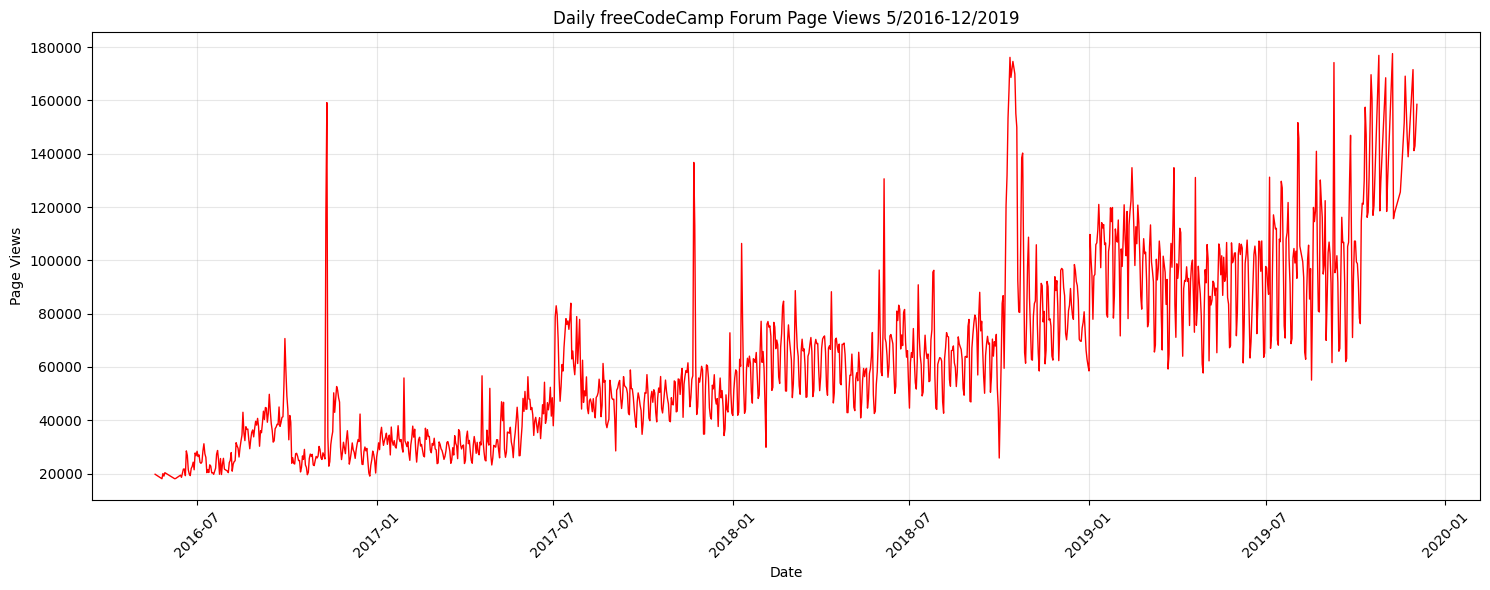

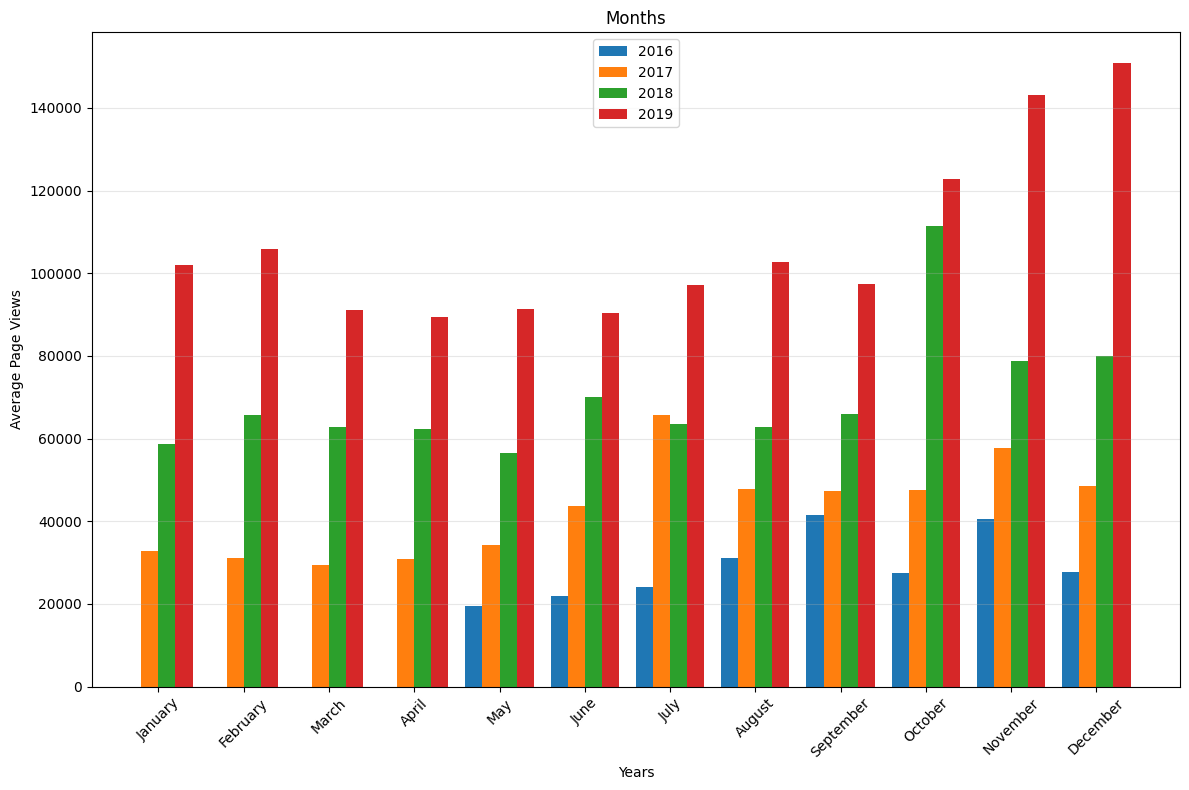

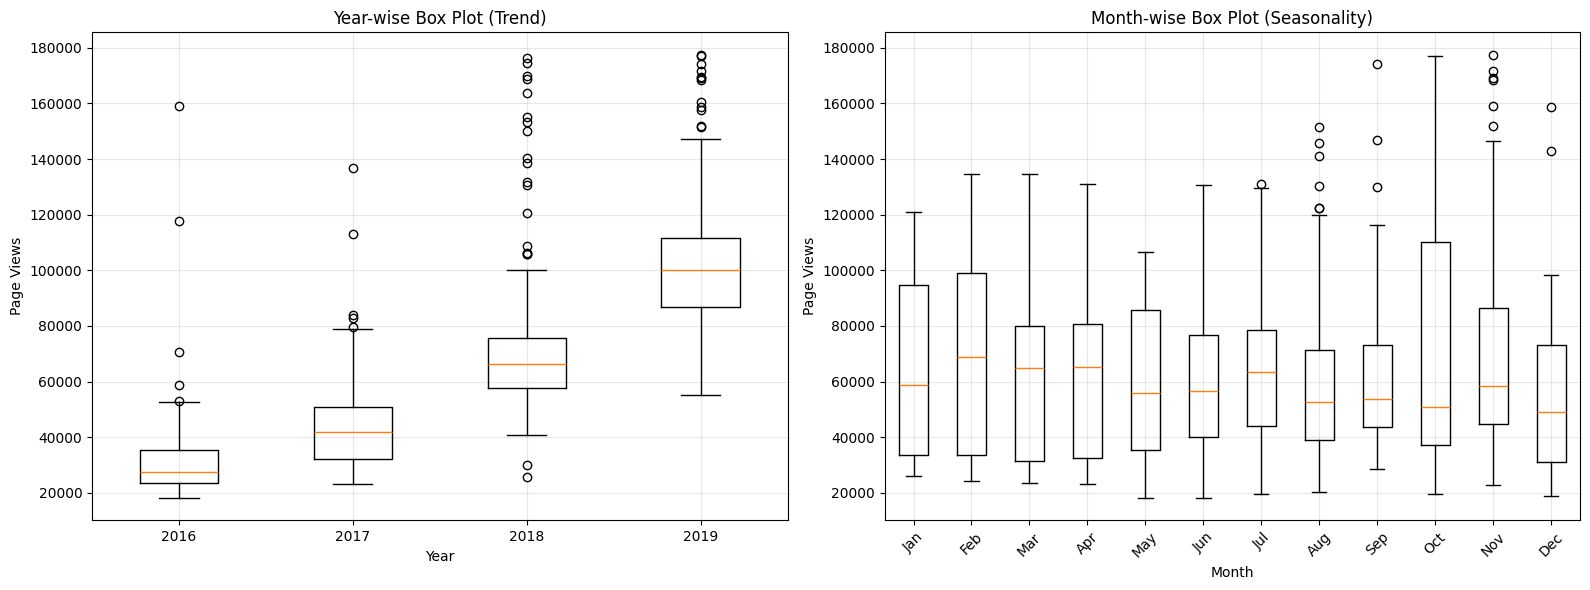


Basic Statistics:
Total data points: 1,238
Average daily page views: 63,060
Median daily page views: 57,198
Standard deviation: 31,675


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

def load_and_clean_data():
    """Load and clean the freeCodeCamp forum page views data"""
    # Load the data
    df = pd.read_csv("C:/Users/Mehak/OneDrive/Documents/Ayaan/Data Science/fcc-forum-pageviews.csv", index_col='date', parse_dates=True)
    
    # Clean the data by filtering out days when page views were in the top 2.5% or bottom 2.5%
    lower_percentile = df['value'].quantile(0.025)
    upper_percentile = df['value'].quantile(0.975)
    
    df_clean = df[(df['value'] >= lower_percentile) & (df['value'] <= upper_percentile)]
    
    return df_clean

def draw_line_plot(df):
    """Create a line chart showing daily page views from 2016-05-09 to 2019-12-03"""
    fig, ax = plt.subplots(figsize=(15, 6))
    
    # Plot the line chart
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    
    # Set title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Format x-axis to show dates nicely
    ax.tick_params(axis='x', rotation=45)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save the figure
    fig.savefig('line_plot.png', dpi=300, bbox_inches='tight')
    
    return fig

def draw_bar_plot(df):
    """Create a bar chart showing average daily page views for each month grouped by year"""
    # Create a copy of the dataframe and add year and month columns
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    
    # Group by year and month, then calculate the mean
    monthly_avg = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
    
    # Create month labels
    month_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create a pivot table for easier plotting
    pivot_data = monthly_avg.pivot(index='month', columns='year', values='value')
    
    # Plot the bar chart
    x_pos = np.arange(len(month_labels))
    width = 0.2
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Different colors for each year
    
    for i, year in enumerate(pivot_data.columns):
        values = [pivot_data.loc[month, year] if month in pivot_data.index else 0 
                 for month in range(1, 13)]
        ax.bar(x_pos + i * width, values, width, label=str(year), color=colors[i % len(colors)])
    
    # Customize the plot
    ax.set_title('Months')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_xticks(x_pos + width * 1.5)
    ax.set_xticklabels(month_labels)
    ax.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, axis='y')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure
    fig.savefig('bar_plot.png', dpi=300, bbox_inches='tight')
    
    return fig

def draw_box_plot(df):
    """Create two adjacent box plots showing value distribution by year and month"""
    # Create a copy and add year and month columns
    df_box = df.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.month_name()
    
    # Create the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Year-wise box plot (Trend)
    years = sorted(df_box['year'].unique())
    year_data = [df_box[df_box['year'] == year]['value'] for year in years]
    
    ax1.boxplot(year_data, labels=years)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.grid(True, alpha=0.3)
    
    # Month-wise box plot (Seasonality)
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Prepare data for monthly box plot
    monthly_data = []
    monthly_labels = []
    
    for month in month_order:
        month_values = df_box[df_box['month'] == month]['value']
        if len(month_values) > 0:
            monthly_data.append(month_values)
            monthly_labels.append(month[:3])  # Use abbreviated month names
    
    ax2.boxplot(monthly_data, labels=monthly_labels)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    ax2.grid(True, alpha=0.3)
    
    # Rotate month labels for better fit
    ax2.tick_params(axis='x', rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure
    fig.savefig('box_plot.png', dpi=300, bbox_inches='tight')
    
    return fig

def main():
    """Main function to run the complete analysis"""
    print("Loading and cleaning data...")
    df = load_and_clean_data()
    
    print(f"Data shape after cleaning: {df.shape}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")
    print(f"Page views range: {df['value'].min():,} to {df['value'].max():,}")
    
    print("\nCreating visualizations...")
    
    # Create line plot
    print("1. Creating line plot...")
    line_fig = draw_line_plot(df)
    
    # Create bar plot
    print("2. Creating bar plot...")
    bar_fig = draw_bar_plot(df)
    
    # Create box plot
    print("3. Creating box plots...")
    box_fig = draw_box_plot(df)
    
    print("\nAll visualizations created successfully!")
    print("Files saved:")
    print("- line_plot.png: Daily page views over time")
    print("- bar_plot.png: Average monthly page views by year")
    print("- box_plot.png: Distribution analysis by year and month")
    
    # Display the plots
    plt.show()
    
    return df

if __name__ == "__main__":
    # Run the analysis
    df = main()
    
    # Display some basic statistics
    print("\nBasic Statistics:")
    print(f"Total data points: {len(df):,}")
    print(f"Average daily page views: {df['value'].mean():,.0f}")
    print(f"Median daily page views: {df['value'].median():,.0f}")
    print(f"Standard deviation: {df['value'].std():,.0f}")